# Chapter 13 - Convolutional Neural Networks

In [1]:
import pandas as pd
import numpy as np

Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s. In the last few years, thanks to the increase in computational power, the amount of available training data, and the tricks presented in Chapter 11 for training deep nets, CNNs have managed to achieve superhuman performance on some complex visual tasks. 

They power image search services, self-driving cars, automatic video classification systems, and more. Moreover, CNNs are not restricted to visual perception: they are also successful at other tasks, such as voice recognition or natural language processing (NLP); however, we will focus on visual applications for now.

## The Architecture of the Visual Cortex

David H. Hubel and Torsten Wiesel performed a series of experiments on cats in 19581 and 19592 (and a few years later on monkeys), giving crucial insights on the structure of the visual cortex (the authors received the Nobel Prize in Physiology or Medicine in 1981 for their work). 

* "Single Unit Activity in Striate Cortex of Unrestrained Cats,” D. Hubel and T. Wiesel (1958).
* “Receptive Fields of Single Neurones in the Cat’s Striate Cortex,” D. Hubel and T. Wiesel (1959).
* “Receptive Fields and Functional Architecture of Monkey Striate Cortex,” D. Hubel and T. Wiesel (1968).

In particular, they showed that many neurons in the visual cortex have a **small local receptive field**, meaning they **react only to visual stimuli located in a limited region of the visual field** (see Figure 13-1, in which the local receptive fields of five neurons are represented by dashed circles). 

The receptive fields of different neurons **may overlap**, and together they tile the whole visual field. Moreover, the authors showed that some neurons react only to images of horizontal lines, while others react only to lines with different orientations (two neurons may have the same receptive field but react to different line orientations). 

They also noticed that some neurons have larger receptive fields, and they react to more complex patterns that are combinations of the lowerlevel patterns. 

These observations led to the idea that the higher-level neurons are based on the outputs of
neighboring lower-level neurons (in Figure 13-1, notice that each neuron is connected only to a few neurons from the previous layer). This powerful architecture is able to detect all sorts of complex patterns in any area of the visual field.

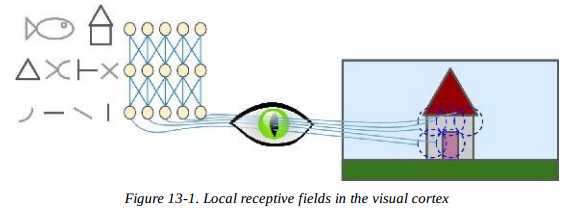

These studies of the visual cortex inspired **the neocognitron, introduced in 1980,** which gradually evolved into what we now call ***convolutional neural networks**. 

An important milestone was a 1998 paper by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner, which introduced the famous *LeNet-5* architecture, widely used to recognize handwritten check numbers. 

This architecture has some building blocks that you already know, such as fully connected layers and sigmoid activation functions, but it also introduces two new building blocks: **convolutional layers** and **pooling layers**. Let’s look at them now.

*NOTE*

Why not simply use a regular deep neural network with fully connected layers for image recognition tasks? 

Unfortunately, although this works fine for small images (e.g., MNIST), it breaks down for larger images because of the huge number of parameters it requires. 
For example, a 100 × 100 image has 10,000 pixels, and if the first layer has just 1,000 neurons (which already severely restricts the amount of information transmitted to the next layer), this means a total of 10 million connections.
And that’s just the first layer. CNNs solve this problem using partially connected layers.

## Convolutional Layer

The most important building block of a CNN is the convolutional layer: neurons in the first
**convolutional layer are not connected to every single pixel** in the input image (like they were in previous chapters), but **only to pixels in their receptive fields** (see Figure 13-2). In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer. 

This architecture allows the network to concentrate on low-level features in the first hidden layer, then assemble them into higher-level features in the next hidden layer, and so on. This hierarchical structure is common in real-world images, which is one of the reasons why CNNs work so well for image recognition.

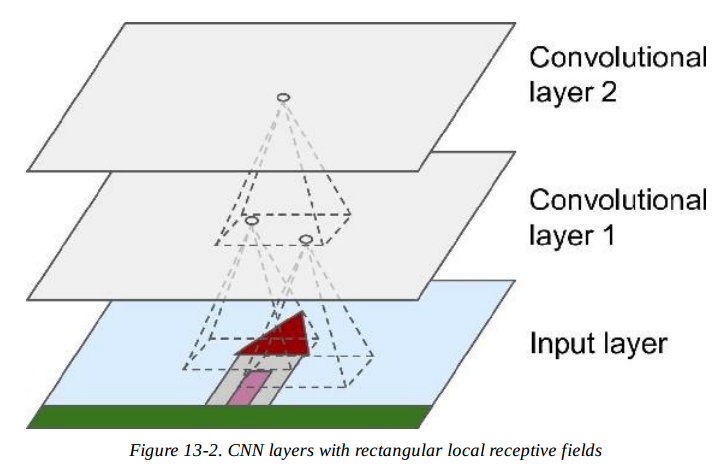

*NOTE*

Until now, all multilayer neural networks we looked at had layers composed of a long line of neurons, and we had to flatten input images to 1D before feeding them to the neural network. Now each layer is represented in 2D, which makes it easier to match neurons with their corresponding inputs.

A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h – 1$, columns $j$ to $j + f_w – 1$, where $f_h$ and $f_w$ are the height and width of the receptive field (see Figure 13-3). In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram. This is called **zero padding**.

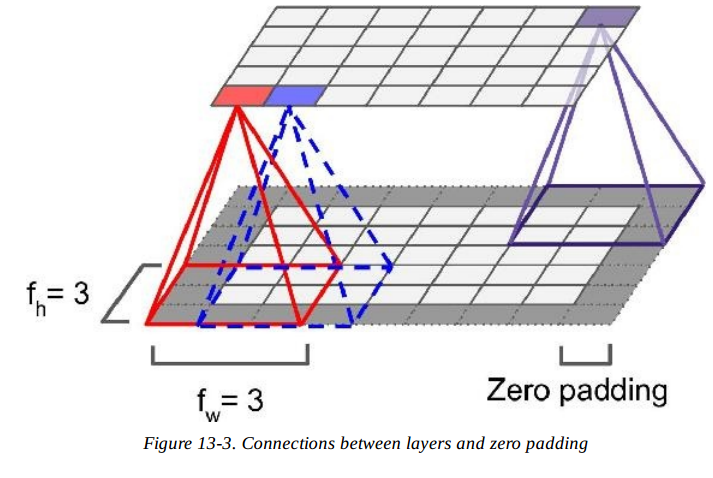

It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive fields, as shown in Figure 13-4. The distance between two consecutive receptive fields is called the **stride**. In the diagram, a 5 × 7 input layer (plus zero padding) is connected to a 3 × 4 layer, using 3 × 3 receptive fields and a stride of 2 (in this example the stride is the same in both directions, but it does not
have to be so). A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i × s_h$ to $i × s_h + f_h – 1$, columns $j × s_w + f_w – 1$, where $sh$ and $s_w$ are the vertical and horizontal strides.

### Filters

A neuron’s weights can be represented as a small image the size of the receptive field. For example, Figure 13-5 shows two possible sets of weights, called **filters** (or convolution kernels). 

The first one is represented as a black square with a vertical white line in the middle (it is a 7 × 7 matrix full of 0s except for the central column, which is full of 1s); neurons using these weights will ignore everything in their receptive field except for the central vertical line (since all inputs will get multiplied by 0, except for the ones located in the central vertical line). 

The second filter is a black square with a horizontal white line in the middle. Once again, neurons using these weights will ignore everything in their receptive field except for the central horizontal line.

Now if all neurons in a layer use the same vertical line filter (and the same bias term), and you feed the network the input image shown in Figure 13-5 (bottom image), the layer will output the top-left image.

Notice that the vertical white lines get enhanced while the rest gets blurred. Similarly, the upper-right image is what you get if all neurons use the horizontal line filter; notice that the horizontal white lines get enhanced while the rest is blurred out. 

Thus, a layer full of neurons using the same filter gives you a **feature map**, which **highlights the areas in an image that are most similar to the filter**. During training, a
**CNN finds the most useful filters** for its task, and it learns to combine them into more complex patterns (e.g., a cross is an area in an image where both the vertical filter and the horizontal filter are active).

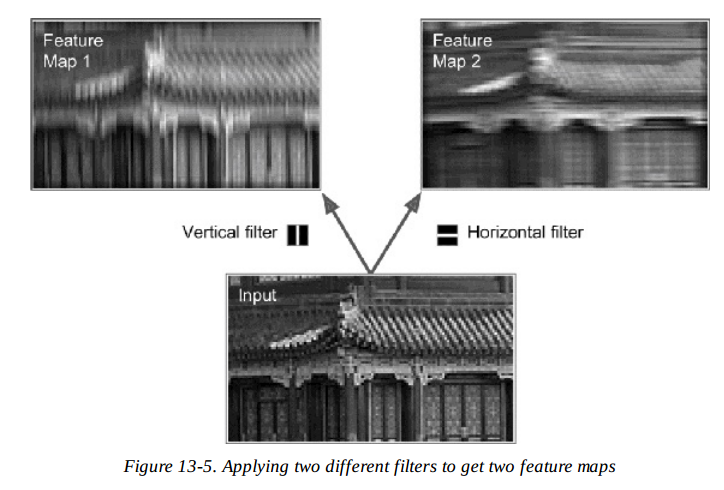

### Stacking Multiple Feature Maps

Up to now, for simplicity, we have represented each convolutional layer as a thin 2D layer, but in reality it is composed of *several feature maps of equal sizes*, so it is more accurately represented in 3D (see Figure 13-6). 

Within one feature map, **all neurons share the same parameters** (weights and bias term), but
*different feature maps may have different parameters*. A neuron’s receptive field is the same as described earlier, but it extends across all the previous layers’ feature maps. In short, **a convolutional layer simultaneously applies multiple filters to its inputs, making it capable of detecting multiple features anywhere in its inputs.**

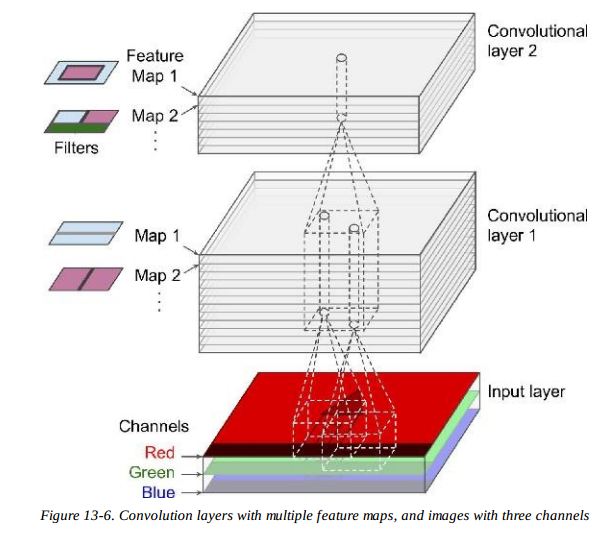

*NOTE*
The fact that all neurons in a feature map share the same parameters dramatically reduces the number of parameters in the model, but most importantly it means that once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location. In contrast, once a regular DNN has learned to recognize a pattern in one location, it can recognize it only in that particular location.

Moreover, input images are also composed of multiple sublayers: one per color channel. There are typically three: red, green, and blue (RGB). Grayscale images have just one channel, but some images may have much more — for example, satellite images that capture extra light frequencies (such as infrared).

Specifically, a neuron located in row $i$, column $j$ of the feature map $k$ in a given convolutional layer $l$ is connected to the outputs of the neurons in the previous layer $l – 1$, located in rows $i × s_h$ to $i × s_h + f_h – 1$ and columns $j × s_w$ to $j × s_w + f_w – 1$, across all feature maps (in layer $l – 1$). 

Note that all neurons located in the same row $i$ and column $j$ but in different feature maps are connected to the outputs of the exact same neurons in the previous layer.

Equation 13-1 summarizes the preceding explanations in one big mathematical equation: it shows how to compute the output of a given neuron in a convolutional layer. It is a bit ugly due to all the different indices, but all it does is calculate the weighted sum of all the inputs, plus the bias term.

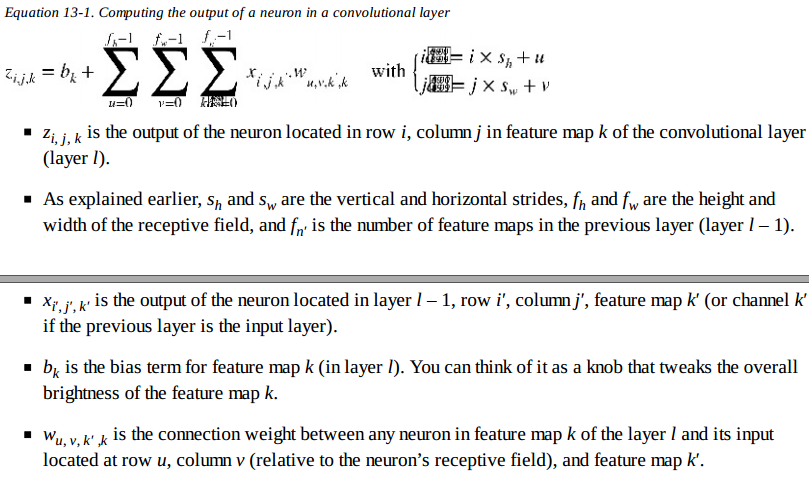

### TensorFlow Implementation

In TensorFlow, each input image is typically represented as a 3D tensor of shape [height, width, channels]. A mini-batch is represented as a 4D tensor of shape [mini-batch size, height,
width, channels]. 

The weights of a convolutional layer are represented as a 4D tensor of shape $[f_h, f_w,
f_{n′}, f_n]$. The bias terms of a convolutional layer are simply represented as a 1D tensor of shape $[f_n]$.

Let’s look at a simple example. The following code loads two sample images, using Scikit-Learn’s `load_sample_images()` (which loads two color images, one of a Chinese temple, and the other of a flower). Then it creates two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the middle), and applies them to both images using a convolutional layer built using TensorFlow’s tf.nn.conv2d() function (with zero padding and a stride of 2). Finally, it plots one of the resulting feature maps (similar to the top-right image in Figure 13-5).

In [2]:
import numpy as np
from sklearn.datasets import load_sample_images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray")  # plot 1st image's 2nd feature map
plt.show()

NameError: name 'load_sample_image' is not defined

The `tf.nn.conv2d()` line deserves a bit of explanation:

* `X` is the input mini-batch (a 4D tensor, as explained earlier).

* `filters` is the set of filters to apply (also a 4D tensor, as explained earlier).

* `strides` is a four-element 1D array, where the two central elements are the vertical and horizontal strides ($s_h$ and $s_w$). The first and last elements must currently be equal to 1. They may one day be used to specify a batch stride (to skip some instances) and a channel stride (to skip some of the previous layer’s feature maps or channels).


* `padding` must be either `VALID` or `SAME`:
    * If set to "VALID", the convolutional layer does not use zero padding, and may ignore some rows and columns at the bottom and right of the input image, depending on the stride, as shown in Figure 13-7 (for simplicity, only the horizontal dimension is shown here, but of course the same logic applies to the vertical dimension).

    * If set to "SAME", the convolutional layer uses zero padding if necessary. In this case, the number of output neurons is equal to the number of input neurons divided by the stride, rounded up (in this example, ceil (13 / 5) = 3). Then zeros are added as evenly as possible around the inputs.

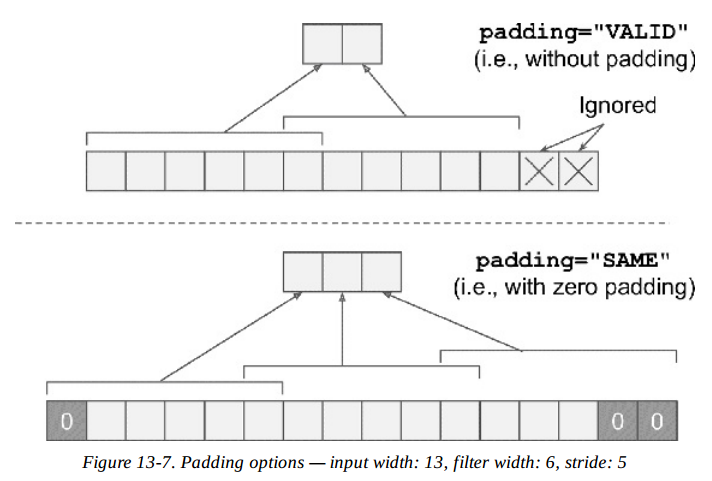

In this simple example, we manually created the filters, but in a real CNN you would let the training algorithm discover the best filters automatically. TensorFlow has a `tf.layers.conv2d()` function which creates the filters variable for you (called kernel), and initializes it randomly. For example, the following code creates an input placeholder followed by a convolutional layer with two 7 × 7 feature maps, using 2 × 2 strides (note that this function only expects the vertical and horizontal strides), and "SAME" padding:

In [ ]:
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2], padding="SAME")

Unfortunately, convolutional layers have quite a few hyperparameters: you must choose the number of filters, their height and width, the strides, and the padding type. As always, you can use cross-validation to find the right hyperparameter values, but this is very time-consuming.

#### Memory Requirements

Another problem with CNNs is that the convolutional layers require a huge amount of RAM, especially during training, because the reverse pass of backpropagation requires all the intermediate values computed during the forward pass.

For example, consider a convolutional layer with 5 × 5 filters, outputting 200 feature maps of size 150 × 100, with stride 1 and SAME padding. If the input is a 150 × 100 RGB image (three channels), then the number of parameters is (5 × 5 × 3 + 1) × 200 = 15,200 (the +1 corresponds to the bias terms), which is fairly small compared to a fully connected layer.7 However, each of the 200 feature maps contains 150 × 100 neurons, and **each of these neurons** needs to compute a weighted sum of its 5 × 5 × 3 = 75 inputs:

that’s a total of 225 million float multiplications. Not as bad as a fully connected layer, but still quite computationally intensive. Moreover, if the feature maps are represented using 32-bit floats, then the convolutional layer’s output will occupy 200 × 150 × 100 × 32 = 96 million bits (about 11.4 MB) of RAM. And that’s just for one instance! If a training batch contains 100 instances, then this layer will use up over 1 GB of RAM!

During inference (i.e., when making a prediction for a new instance) *the RAM occupied by one layer can be released as soon as the next layer has been computed*, so you only need as much RAM as required by two consecutive layers. But during training everything computed during the **forward pass needs to be preserved for the reverse pass**, so the amount of RAM needed is (at least) the total amount of RAM required by all layers.

*TIP*
If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you could distribute the CNN across multiple devices.

### Pooling Layer

Once you understand how convolutional layers work, the pooling layers are quite easy to grasp. 

Their goal is to **subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting)**. 

Reducing the input image size also **makes the neural network tolerate a little bit of image shift (location invariance**).

Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field. 
You must define its size, the stride, and the padding type, just like before. 

However, a pooling neuron **has no weights**; all it does is aggregate the inputs using an aggregation function such as the max or mean.

Figure 13-8 shows a max pooling layer, which is the most common type of pooling layer. In this example, we use a 2 × 2 pooling kernel, a stride of 2, and no padding. Note that only the max input value in each kernel makes it to the next layer. The other inputs are dropped.

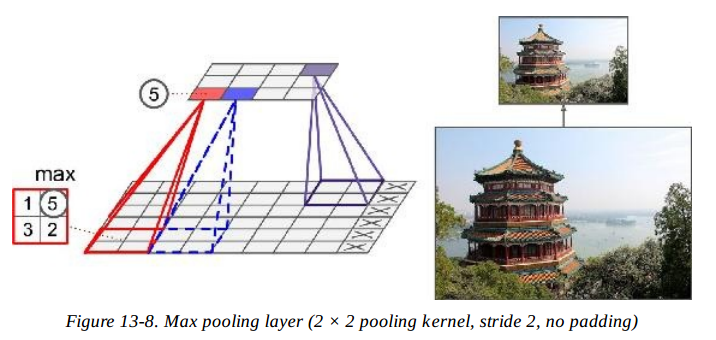

This is obviously a very destructive kind of layer: even with a tiny 2 × 2 kernel and a stride of 2, the output will be two times smaller in both directions (so its area will be four times smaller), simply dropping 75% of the input values.

A pooling layer typically works **on every input channel independently**, so the output depth is the **same as the input depth**. 

You may alternatively **pool over the depth dimension**, as we will see next, in which case the image’s spatial dimensions (height and width) remain unchanged, but the number of channels is
reduced.

Implementing a max pooling layer in TensorFlow is quite easy. The following code creates a max pooling layer using a 2 × 2 kernel, stride 2, and no padding, then applies it to all the images in the dataset:

In [ ]:
[...]  # load the image dataset, just like above
# Create a graph with input X plus a max pooling layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
    plt.show()

The `ksize` argument contains the kernel shape along all four dimensions of the input tensor: [batch size, height, width, channels]. TensorFlow currently does not support pooling over multiple instances, so the first element of `ksize` must be equal to 1. Moreover, it does not support pooling over both the spatial dimensions (height and width) and the depth dimension, so either `ksize[1]` and `ksize[2]` must both be equal to 1, or `ksize[3]` must be equal to 1.
To create an average pooling layer, just use the `avg_pool()` function instead of `max_pool()`.


### CNN Architectures

Typical CNN architectures stack a few convolutional layers (each one generally followed by a ReLU layer), then a pooling layer, then another few convolutional layers (+ReLU), then another pooling layer, and so on. 

The image gets smaller and smaller as it progresses through the network, but it also typically
gets deeper and deeper (i.e., with **more feature maps**) thanks to the convolutional layers (see Figure 13-9). At the top of the stack, **a regular feedforward neural network** is added, composed of a few fully connected layers (+ReLUs), and the final layer outputs the prediction (e.g., a softmax layer that outputs estimated class probabilities).

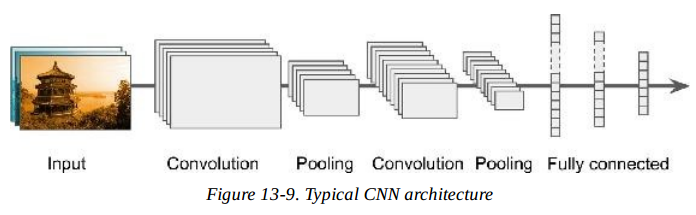

*TIP*
A common mistake is to use convolution kernels that are too large. You can often get the same effect as a 9 × 9 kernel by **stacking two 3 × 3 kernels on top of each other**, for a lot less compute.

Over the years, variants of this fundamental architecture have been developed, leading to amazing advances in the field. A good measure of this progress is the error rate in competitions such as the *ILSVRC ImageNet challenge*. 

In this competition the top-5 error rate for image classification fell from over 26% to barely over 3% in just five years. 

The top-five error rate is the number of test images for which the system’s top 5 predictions did not include the correct answer. 

The images are large (256 pixels high) and there are 1,000 classes, some of which are really subtle (try distinguishing 120 dog breeds).

Looking at the evolution of the winning entries is a good way to understand how CNNs work.
We will first look at the classical LeNet-5 architecture (1998), then three of the winners of the ILSVRC challenge: AlexNet (2012), GoogLeNet (2014), and ResNet (2015).

*OTHER VISUAL TASKS*

There was stunning progress as well in other visual tasks such as **object detection and localization, and image segmentation**. 

In object detection and localization, the neural network typically outputs a sequence of *bounding boxes around various objects in the image*. For example, see Maxine Oquab et al.’s 2015 paper that outputs a heat map for each object class, or Russell Stewart et al.’s 2015 paper that uses a combination of a CNN to detect faces and a recurrent neural network to output a sequence of bounding boxes around them. 

In image segmentation, the net outputs an image (usually of the same size as the input) where each pixel indicates the class of the object to which the corresponding input pixel belongs. For example, check out Evan Shelhamer et al.’s 2016 paper.

### LeNet-5

The LeNet-5 architecture is perhaps the most widely known CNN architecture. As mentioned earlier, it was created by Yann LeCun in 1998 and widely used for handwritten digit recognition (MNIST). It is composed of the layers shown in Table 13-1.

There are a few extra details to be noted:

* MNIST images are 28 × 28 pixels, but they are zero-padded to 32 × 32 pixels and normalized before being fed to the network. The rest of the network does not use any padding, which is why the size keeps shrinking as the image progresses through the network.

* The average pooling layers are slightly more complex than usual: each neuron computes the mean of its inputs, then multiplies the result by a learnable coefficient (one per map) and adds a learnable bias term (again, one per map), then finally applies the activation function.

* Most neurons in C3 maps are connected to neurons in only three or four S2 maps (instead of all six S2 maps). See table 1 in the original paper for details.

* The output layer is a bit special: instead of computing the dot product of the inputs and the weight vector, each neuron outputs the square of the Euclidian distance between its input vector and its weight vector. Each output measures how much the image belongs to a particular digit class. The cross entropy cost function is now preferred, as it penalizes bad predictions much more, producing larger gradients and thus converging faster.

Yann LeCun’s website (“LENET” section) features great demos of LeNet-5 classifying digits.

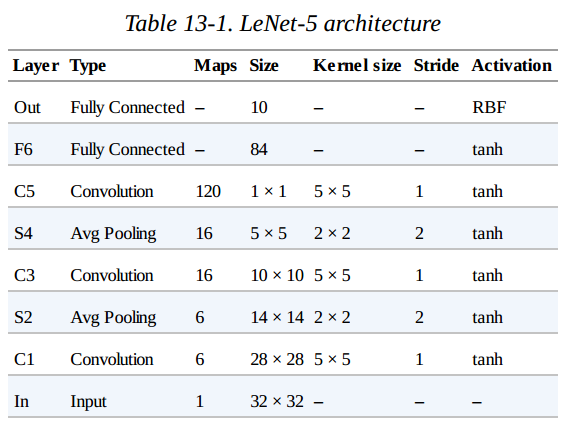

The AlexNet CNN architecture won the 2012 ImageNet ILSVRC challenge by a large margin: it achieved 17% top-5 error rate while the second best achieved only 26%! 

It was developed by Alex Krizhevsky (hence the name), Ilya Sutskever, and Geoffrey Hinton. It is quite similar to LeNet-5, only much larger and deeper, and it was the first to stack *8convolutional layers directly on top of each other, instead of stacking a pooling layer on top of each convolutional layer**. Table 13-2 presents this architecture.

To reduce overfitting, the authors used two regularization techniques we discussed in previous chapters:

* first they applied dropout (with a 50% dropout rate) during training to the outputs of layers F8 and F9.

* Second, they performed data augmentation by randomly shifting the training images by various offsets, flipping them horizontally, and changing the lighting conditions.


* AlexNet also uses a *competitive normalization* step immediately after the ReLU step of layers C1 and C3, called **local response normalization**. This form of normalization makes the neurons that most strongly activate inhibit neurons at the same location but in neighboring feature maps (such competitive activation has been observed in biological neurons). This encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization.

Equation 13-2 shows how to apply LRN.

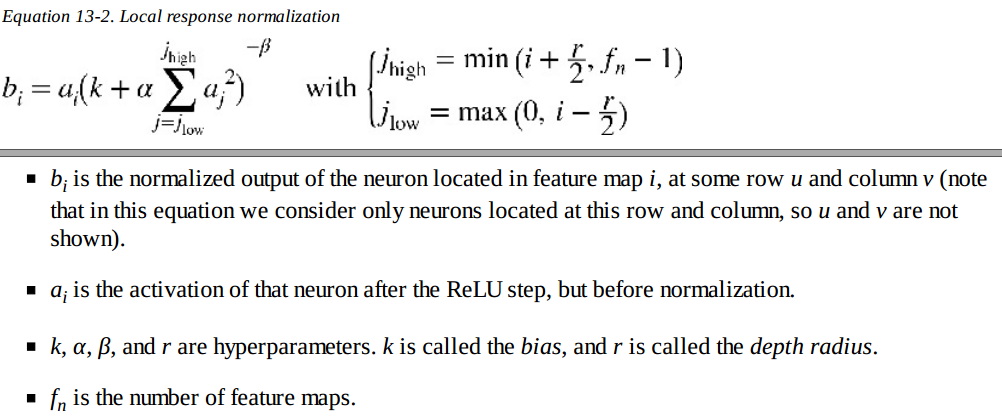

For example, if r = 2 and a neuron has a strong activation, it will inhibit the activation of the neurons located in the feature maps immediately above and below its own.

In AlexNet, the hyperparameters are set as follows: r = 2, α = 0.00002, β = 0.75, and k = 1. This step can be implemented using TensorFlow’s `tf.nn.local_response_normalization()` operation.

A variant of AlexNet called **ZF Net** was developed by Matthew Zeiler and Rob Fergus and won the 2013 ILSVRC challenge. It is essentially AlexNet with a few tweaked hyperparameters (number of feature maps, kernel size, stride, etc.).

### GoogLeNet

The GoogLeNet architecture was developed by Christian Szegedy et al. from Google Research,10 and it won the ILSVRC 2014 challenge by pushing the top-5 error rate below 7%. This great performance came in large part from the fact that the network was much deeper than previous CNNs (see Figure 13-11). 

This was made possible by **sub-networks called inception modules**,11 which allow GoogLeNet to use parameters much more efficiently than previous architectures: GoogLeNet actually has 10 times **fewer parameters** than AlexNet (roughly 6 million instead of 60 million).

Figure 13-10 shows the architecture of an inception module. The notation “3 × 3 + 2(S)” means that the layer uses a 3 × 3 kernel, stride 2, and SAME padding. 

The input signal is first copied and fed to four different layers. All convolutional layers use the ReLU activation function. 

Note that the second set of convolutional layers uses different kernel sizes (1 × 1, 3 × 3, and 5 × 5), allowing them to **capture patterns at different scales**. 

Also note that every single layer uses a stride of 1 and **SAME padding (even the max pooling layer)**, so their outputs all have the same height and width as their inputs. This makes it
possible to concatenate all the outputs along the depth dimension in the final depth concat layer (i.e., stack the feature maps from all four top convolutional layers). This concatenation layer can be implemented in TensorFlow using the `tf.concat()` operation, with `axis=3` (axis 3 is the depth).

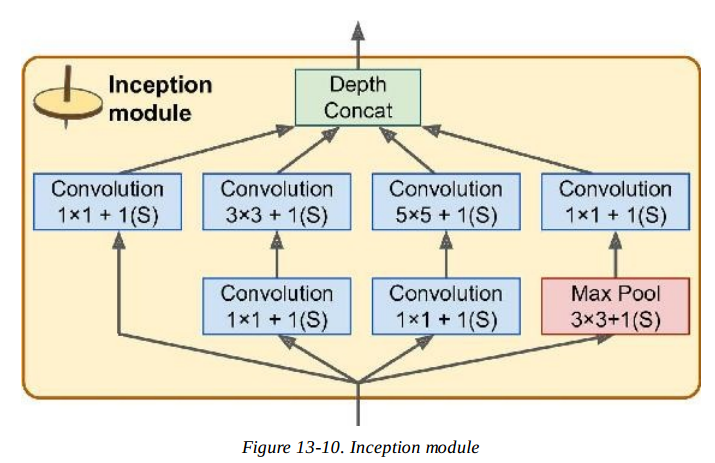

You may wonder why inception modules have **convolutional layers with 1 × 1 kernels**. Surely these layers cannot capture any features since they look at only one pixel at a time? In fact, these layers serve two purposes:

* First, they are configured to **output many fewer feature maps than their inputs**, so they serve as bottleneck layers, meaning they **reduce dimensionality**. This is particularly useful before the 3 × 3 and 5 × 5 convolutions, since these are very computationally expensive layers.

* Second, each pair of convolutional layers ([1 × 1, 3 × 3] and [1 × 1, 5 × 5]) **acts like a single, powerful convolutional layer, capable of capturing more complex patterns**. Indeed, instead of sweeping **a simple linear classifier across the image (as a single convolutional layer does)**, this pair of convolutional layers sweeps a two-layer neural network across the image.

In short, you can think of the whole inception module as a convolutional layer on steroids, able to output feature maps that capture complex patterns at various scales.

*WARNING*
The number of convolutional kernels for each convolutional layer is a hyperparameter. Unfortunately, this means that you have six more hyperparameters to tweak for every inception layer you add.

Now let’s look at the architecture of the GoogLeNet CNN (see Figure 13-11). It is so deep that we had to represent it in three columns, but GoogLeNet is actually one tall stack, including *nine inception modules* (the boxes with the spinning tops) that actually contain three layers each. 

The **number of feature maps output by each convolutional layer and each pooling layer is shown before the kernel size**. The six numbers in the inception modules represent the number of feature maps output by each convolutional layer in the module (in the same order as in Figure 13-10). Note that all the convolutional layers use the ReLU activation function.

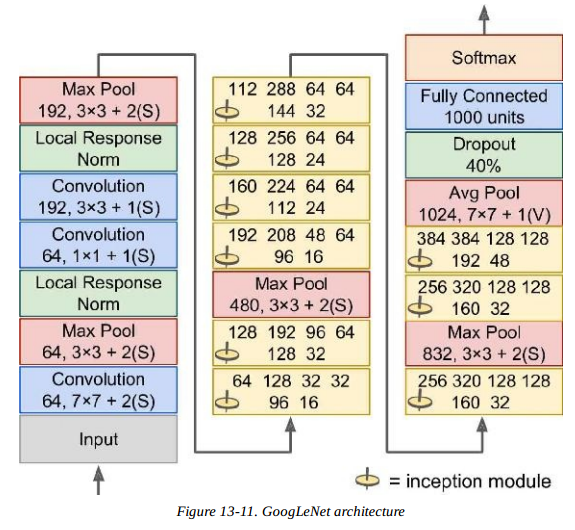

Let’s go through this network:

* The first two layers divide the image’s height and width by 4 (so its area is divided by 16), to reduce the computational load.

* Then the local response normalization layer ensures that the previous layers learn a wide variety of features.

* Two convolutional layers follow, where the first acts like a **bottleneck layer**. As explained earlier, you can think of this pair as a **single smarter convolutional layer**.

* Again, a local response normalization layer ensures that the previous layers capture a wide variety of patterns.

* Next a max pooling layer reduces the image height and width by 2, again to speed up computations.

* Then comes the tall stack of nine inception modules, interleaved with a couple max pooling layers to reduce dimensionality and speed up the net.

* Next, the average pooling layer uses a kernel the size of the feature maps with VALID padding, outputting 1 × 1 feature maps: this surprising strategy is called **global average pooling**. It effectively forces the previous layers to produce feature maps that are actually *confidence maps* for each target class (since other kinds of features would be destroyed by the averaging step). This makes it **unnecessary to have several fully connected layers** at the top of the CNN (like in AlexNet), considerably reducing the number of parameters in the network and limiting the risk of overfitting.


* The last layers are self-explanatory: dropout for regularization, then a fully connected layer with a softmax activation function to output estimated class probabilities.


This diagram is slightly simplified: the original GoogLeNet architecture also included two *auxiliary classifiers* plugged on top of the third and sixth inception modules. They were both composed of one average pooling layer, one convolutional layer, two fully connected layers, and a softmax activation layer.
During training, **their loss (scaled down by 70%) was added to the overall loss**. The goal was to fight the vanishing gradients problem and regularize the network. However, it was shown that their effect was relatively minor.

### ResNet

Last but not least, the winner of the ILSVRC 2015 challenge was the Residual Network (or ResNet), developed by Kaiming He et al., which delivered an astounding top-5 error rate under 3.6%, using an extremely deep CNN composed of 152 layers. The key to being able to train such a deep network is to use **skip connections** (also called shortcut connections): the signal feeding into a layer is also added to the output of a layer located a bit higher up the stack. 

Let’s see why this is useful.

When training a neural network, the goal is to make it model a target function h(x). If you add the input x to the output of the network (i.e., you add a skip connection), then the network will be forced to model f(x) = h(x) – x rather than h(x). This is called **residual learning** (see Figure 13-12).

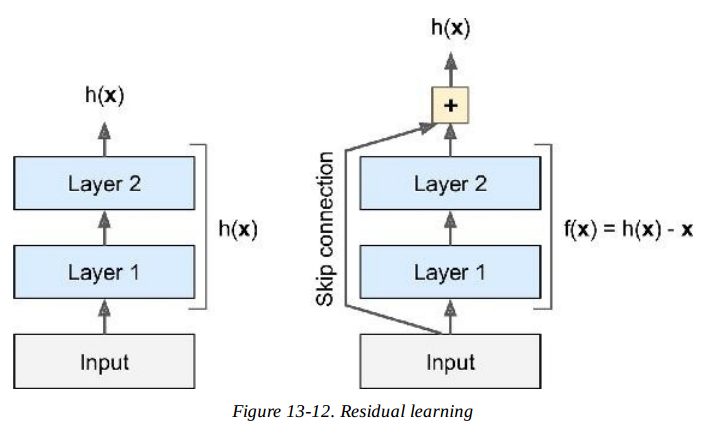

When you initialize a regular neural network, its weights are close to zero, so the network just outputs values close to zero. 

If you add a skip connection, the resulting network just outputs a copy of its inputs; in other words, it initially models *the identity function*. If the target function is fairly close to the identity function (which is often the case), this will speed up training considerably.


Moreover, if you add many skip connections, the network can start making progress even if several layers have not started learning yet (see Figure 13-13). Thanks to skip connections, the signal can easily make its way across the whole network. The deep residual network can be seen as a stack of residual units, where each residual unit is a small neural network with a skip connection.

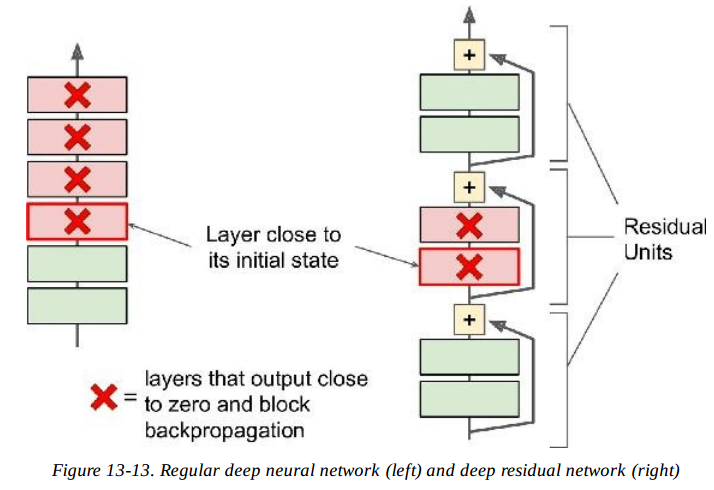

Now let’s look at ResNet’s architecture (see Figure 13-14). It is actually surprisingly simple. It starts and ends exactly like GoogLeNet (except without a dropout layer), and in between is just a very deep stack of simple residual units. Each residual unit is composed of two convolutional layers, with Batch Normalization (BN) and ReLU activation, using 3 × 3 kernels and preserving spatial dimensions (stride 1, SAME padding).

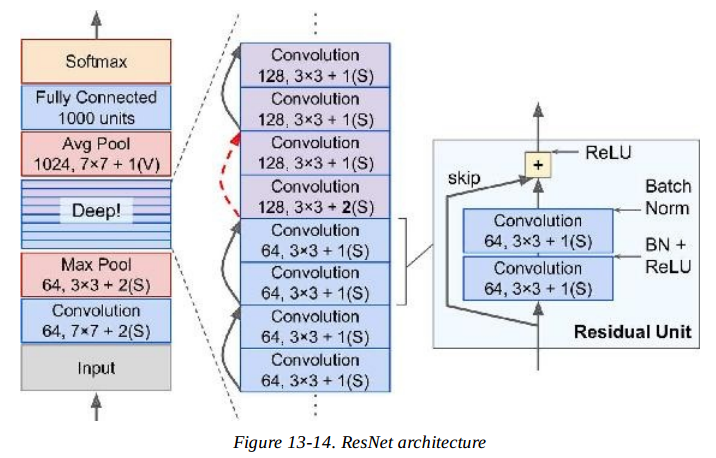

Note that the number of **feature maps is doubled** every few residual units, at the same time as **their height and width are halved** (using a convolutional layer with stride 2). When this happens the inputs cannot be added directly to the outputs of the residual unit since they don’t have the same shape (for example, this problem affects the skip connection represented by the dashed arrow in Figure 13-14). To solve this problem, the **inputs are passed through a 1 × 1 convolutional layer with stride 2 and the right number of output feature maps** (see Figure 13-15).

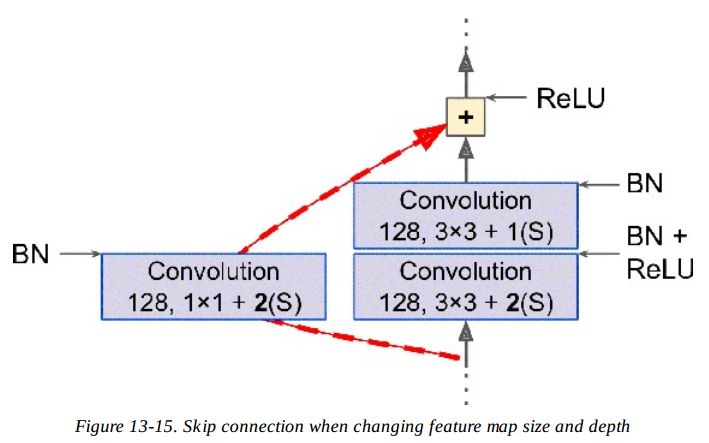

ResNet-34 is the ResNet with 34 layers (only counting the convolutional layers and the fully connected layer) containing three residual units that output 64 feature maps, 4 RUs with 128 maps, 6 RUs with 256 maps, and 3 RUs with 512 maps.


ResNets deeper than that, such as ResNet-152, use slightly different residual units. Instead of two 3 × 3 convolutional layers with (say) 256 feature maps, they use three convolutional layers: first a 1 × 1 convolutional layer with just 64 feature maps (4 times less), which acts a a bottleneck layer (as discussed already), then a 3 × 3 layer with 64 feature maps, and finally another 1 × 1 convolutional layer with 256 feature maps (4 times 64) that restores the original depth. ResNet-152 contains three such RUs that output 256 maps, then 8 RUs with 512 maps, a whopping 36 RUs with 1,024 maps, and finally 3 RUs with 2,048 maps.


One clear trend is that CNNs keep getting deeper and deeper. They are also getting lighter, requiring fewer and fewer parameters. At present, the ResNet architecture is both the most powerful and arguably the simplest, so it is really the one you should probably use for now, but keep looking at the ILSVRC challenge every year. 

The 2016 winners were the Trimps-Soushen team from China with an astounding 2.99% error rate. To achieve this they trained combinations of the previous models and joined them into an ensemble. 

Depending on the task, the reduced error rate may or may not be worth the extra complexity.
There are a few other architectures that you may want to look at, in particular VGGNet13 (runner-up of the ILSVRC 2014 challenge) and Inception-v414 (which merges the ideas of GoogLeNet and ResNet and achieves close to 3% top-5 error rate on ImageNet classification).

**TENSORFLOW CONVOLUTION OPERATIONS**

TensorFlow also offers a few other kinds of convolutional layers:

`tf.layers.conv1d()` creates a convolutional layer for 1D inputs. This is useful, for example, in natural language processing, where a sentence may be represented as a 1D array of words, and the receptive field covers a few neighboring words.

`tf.layers.conv3d()` creates a convolutional layer for 3D inputs, such as 3D PET scan.

`tf.nn.atrous_conv2d()` creates an atrous convolutional layer (“à trous” is French for “with holes”). This is equivalent to using a regular convolutional layer with a filter dilated by inserting rows and columns of zeros (i.e., holes). For example, a 1 × 3 filter equal to [[1,2,3]] may be dilated with a dilation rate of 4, resulting in a dilated filter [[1, 0, 0, 0, 2, 0, 0, 0, 3]]. This allows the convolutional layer to have a larger receptive field at no computational price and using no extra parameters.


`tf.layers.conv2d_transpose()` creates a transpose convolutional layer, sometimes called a **deconvolutional layer**,15 which upsamples an image. It does so by inserting zeros between the inputs, so you can think of this as a regular convolutional layer using a fractional stride. Upsampling is useful, for example, in image segmentation: in a typical CNN, feature maps get smaller and smaller as you progress through the network, so if you want to output an image of the same size as the input, you need an upsampling layer.

`tf.nn.depthwise_conv2d()` creates a depthwise convolutional layer that applies every filter to every individual input channel independently. Thus, if there are fn filters and $f_{n′}$ input channels, then this will output $ f_{n} × f_{n′}$ feature maps.

`tf.layers.separable_conv2d()` creates a separable convolutional layer that first acts like a depthwise convolutional layer, then applies a 1 × 1 convolutional layer to the resulting feature maps. This makes it possible to apply filters to arbitrary sets of inputs channels.

### Exercises

1. What are the advantages of a CNN over a fully connected DNN for image classification?

2. Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and SAME padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels. What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?

3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?

4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

5. When would you want to add a local response normalization layer?

6. Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet and ResNet?

7. Build your own CNN and try to achieve the highest possible accuracy on MNIST.

8. Classifying large images using Inception v3.

    a. Download some images of various animals. Load them in Python, for example using the `matplotlib.image.mpimg.imread()` function or the `scipy.misc.imread()` function. Resize and/or crop them to 299 × 299 pixels, and ensure that they have just three channels (RGB), with no transparency channel.

    b. Download the latest pretrained Inception v3 model: the checkpoint is available at
https://goo.gl/nxSQvl.

    c. Create the Inception v3 model by calling the `inception_v3()` function, as shown below. This must be done within an argument scope created by the inception_v3_arg_scope() function. Also, you must set `is_training=False` and `num_classes=1001` like so:
    
from tensorflow.contrib.slim.nets import inception

import tensorflow.contrib.slim as slim

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")

with slim.arg_scope(inception.inception_v3_arg_scope()):

    logits, end_points = inception.inception_v3(
    X, num_classes=1001, is_training=False)
    predictions = end_points["Predictions"]
    saver = tf.train.Saver()

    d. Open a session and use the Saver to restore the pretrained model checkpoint you downloaded earlier.
    e. Run the model to classify the images you prepared. Display the top five predictions for each image, along with the estimated probability (the list of class names is available at https://goo.gl/brXRtZ). How accurate is the model?

9. Transfer learning for large image classification.

    a. Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can just use an existing dataset, such as the flowers dataset or MIT’s places dataset (requires registration, and it is huge).
    
    b. Write a preprocessing step that will resize and crop the image to 299 × 299, with some randomness for data augmentation.
    c. Using the pretrained Inception v3 model from the previous exercise, freeze all layers up to the bottleneck layer (i.e., the last layer before the output layer), and replace the output layer with the appropriate number of outputs for your new classification task (e.g., the flowers dataset has five mutually exclusive classes so the output layer must have five neurons and use the softmax activation function).
    d. Split your dataset into a training set and a test set. Train the model on the training set and evaluate it on the test set.
    
10. Go through TensorFlow’s DeepDream tutorial. It is a fun way to familiarize yourself with various ways of visualizing the patterns learned by a CNN, and to generate art using Deep Learning.